In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [ ]:
df = pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Analyzing the Duration Attribute

In [ ]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
32h 20m      1
3h 25m       1
36h 25m      1
42h 5m       1
32h 55m      1
Name: Duration, Length: 368, dtype: int64

### Checking for NaN values

In [ ]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Dropping the NaN values
df.dropna(inplace=True)

## Exploratory Data Analysis

### Converting the date strings to timestamps

Since the data is taken from a single year, only the date and month of journey is needed for the prediction

In [ ]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# Dropping Date of Journey Attribute as we have extracted info from it earlier
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
# Extracting hour and minute from the departure time

df['Dep_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour 
df['Dep_Min'] = pd.to_datetime(df.Dep_Time).dt.minute

df.drop('Dep_Time',inplace=True,axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
# Extracting hour and minute from the arrival time

df['Arr_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour 
df['Arr_Min'] = pd.to_datetime(df.Arrival_Time).dt.minute

df.drop('Arrival_Time',inplace=True,axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
# Extracting the hour and minute from duration string attribute

duration = list(df.Duration)

# Adding the missing hour or minute to the duration attribute
for i in range(len(duration)):
  if(len(duration[i].split())!=2):
    if 'h' in duration[i]:
      # Adding 0 min to the duration string
      duration[i] = duration[i] + " 0m"
    else:
      # Adding 0 hour to the duration string
      duration[i] = "0h "+duration[i]

duration_hour = [time.split('h')[0] for time in duration]
duration_min = [time.split('m')[0].split()[-1] for time in duration]

# Creating new attributes
df['Duration_Hour'] = duration_hour
df['Duration_Min'] = duration_min

In [ ]:
df.drop('Duration',inplace=True,axis=1)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data
#### Using **OneHotEncoding** for nominal data (Unordered Data)
#### Using **LabelEncoder** for ordinal data (Ordered Data)

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

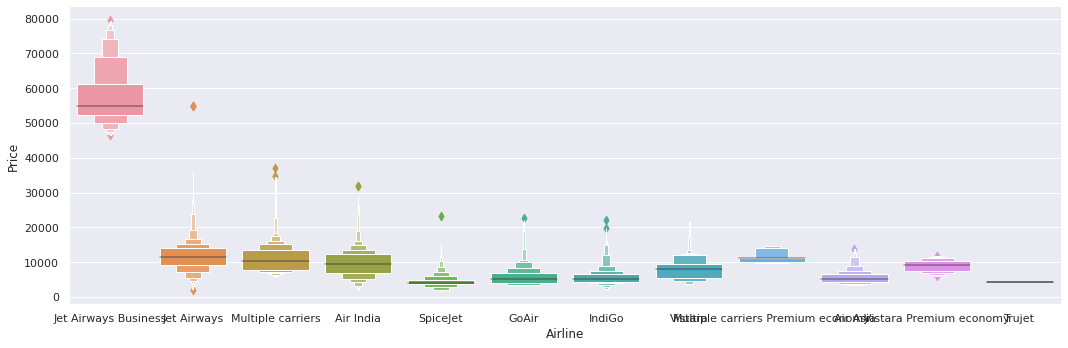

In [ ]:
# Visualizing the Price Distrinution of each Airline

sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),aspect=3,kind='boxen')

Apart from Jet Airways Business class, all other airline price are similar to each other.
So, it is a nominal data

In [ ]:
# One Hot Encoding on Airline Attribute

airline = df[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

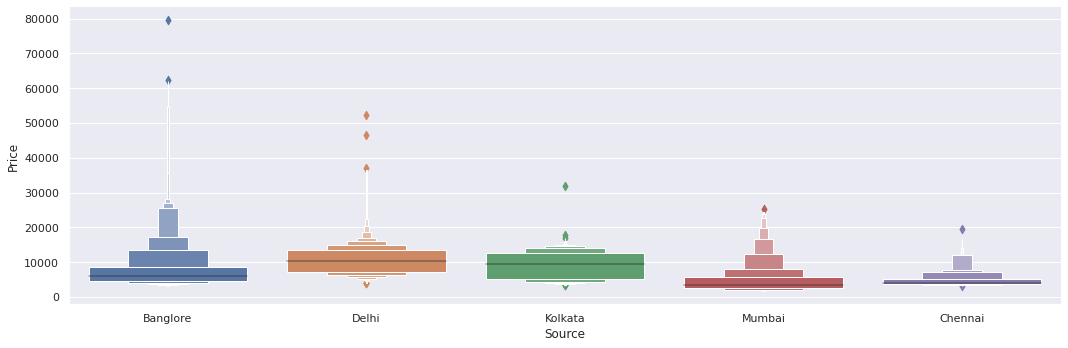

In [ ]:
# Visualizing the Price Distrinution wrt to source

sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),aspect=3,kind='boxen')

Airline fare does not differ much on source data.
So, it is a nominal data

In [ ]:
# One Hot Encoding on Source Attribute

source = df[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


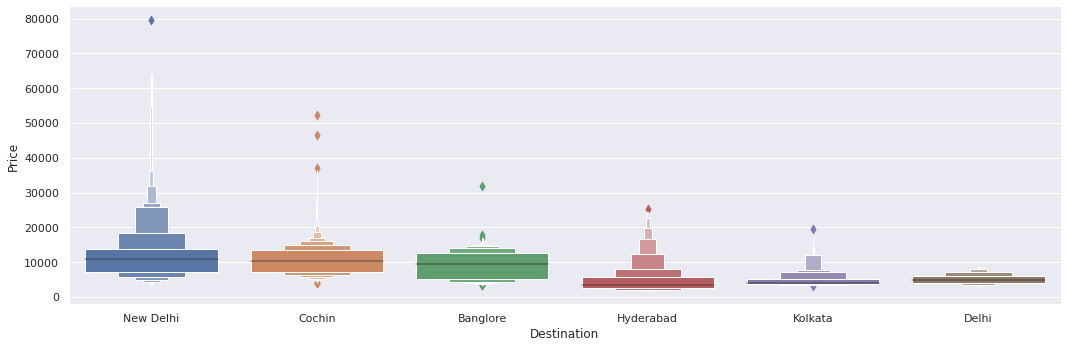

In [ ]:
# Visualizing the Price Distrinution wrt to destination

sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),aspect=3,kind='boxen')

In [ ]:
# Destination
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
# One Hot Encoding on Destination

destination = df[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# Analyzing Additional Info variable

df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

<h4> Since 'No info' occurs more significantly than all other attributes combined, we do not take additional info into consideration for model building </h4> 

#### Route and total stops convey the same type of information, so we remove the Route attribute

In [ ]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JLR → HYD                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → NDC → HYD                   1
BOM → CCU → HYD                   1
CCU → VTZ → BLR                   1
Name: Route, Length: 128, dtype: int64

In [ ]:
# Dropping Additional Info and Route attribute
df.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [ ]:
# Analyzing the total stops attribute
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# Creating a dict to convert the Total_Stops attribute from string object to int
# The Total Stops is a ordinal data
stops = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops'] = df['Total_Stops'].replace(stops)

In [ ]:
traindata = pd.concat([df,airline,source,destination],axis=1)

In [ ]:
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
traindata.shape

(10682, 33)

In [ ]:
# Dropping Airline, Source, Destination Attributes

traindata.drop(['Airline'	,'Source',	'Destination'],axis=1,inplace=True)

In [ ]:
traindata.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Test Data Preprocessing

In [ ]:
test = pd.read_excel('test.xlsx')

#### Performing all the feature engineering steps

In [ ]:
# Dropping the NaN values
test.dropna(inplace=True)

# Converting date string into day and month

test["Journey_day"] = pd.to_datetime(test.Date_of_Journey, format="%d/%m/%Y").dt.day
test['Journey_month'] = pd.to_datetime(test.Date_of_Journey,format='%d/%m/%Y').dt.month
## Dropping Date of Journey Attribute as we have extracted info from it earlier
test.drop('Date_of_Journey',axis=1,inplace=True)

## Extracting hour and minute from the departure time
test['Dep_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour 
test['Dep_Min'] = pd.to_datetime(test.Dep_Time).dt.minute

test.drop('Dep_Time',inplace=True,axis=1)

## Extracting hour and minute from the arrival time
test['Arr_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour 
test['Arr_Min'] = pd.to_datetime(test.Arrival_Time).dt.minute

test.drop('Arrival_Time',inplace=True,axis=1)

## Extracting the hour and minute from duration string attribute
duration = list(test.Duration)

## Adding the missing hour or minute to the duration attribute
for i in range(len(duration)):
  if(len(duration[i].split())!=2):
    if 'h' in duration[i]:
      ### Adding 0 min to the duration string
      duration[i] = duration[i] + " 0m"
    else:
      ### Adding 0 hour to the duration string
      duration[i] = "0h "+duration[i]

duration_hour = [time.split('h')[0] for time in duration]
duration_min = [time.split('m')[0].split()[-1] for time in duration]

### Creating new attributes
test['Duration_Hour'] = duration_hour
test['Duration_Min'] = duration_min
test.drop('Duration',inplace=True,axis=1)



# Categorical Variable Encoding

## One Hot Encoding on Airline Attribute
airline = test[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)
airline.head()

## One Hot Encoding on Source Attribute
source = test[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

## One Hot Encoding on Destination
destination = test[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

## Dropping Additional Info and Route attribute
test.drop(['Additional_Info','Route'],inplace=True,axis=1)

## Creating a dict to convert the Total_Stops attribute from string object to int
stops = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}
test['Total_Stops'] = test['Total_Stops'].replace(stops)

testdata = pd.concat([test,airline,source,destination],axis=1)

In [ ]:
# Dropping Airline, Source, Destination Attributes
testdata.drop(['Airline'	,'Source',	'Destination'],axis=1,inplace=True)

In [ ]:
testdata.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hour,Duration_Min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection
<b> We need to select the attributes which have play a major role in predicting the output </b>
* Using HeatMap (Correlation between attributes)
* Using Feature Importance

In [ ]:
traindata.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_Hour', 'Duration_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = traindata.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Min', 'Arr_Hour', 'Arr_Min', 'Duration_Hour', 'Duration_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [ ]:
X.shape

(10682, 29)

In [ ]:
y = traindata.iloc[:,1]

In [ ]:
y.shape

(10682,)

### Using HeatMap

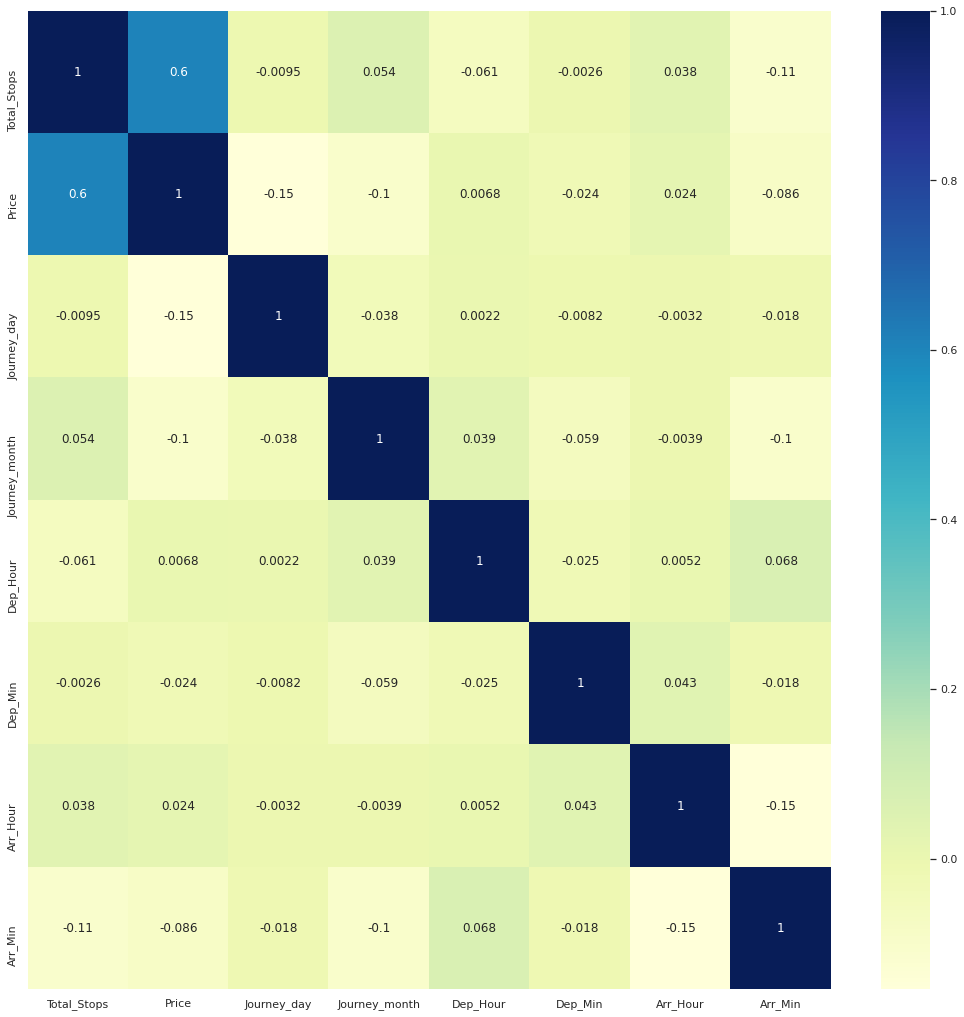

In [ ]:
# Heatmap to analyze the correaltion between independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

<b> The map shows a high correlation between price and Total Stops </b>

### Using Feature Importance 

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

selector = ExtraTreesRegressor()
selector.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
# Getting the feature importance
featureimportance = selector.feature_importances_

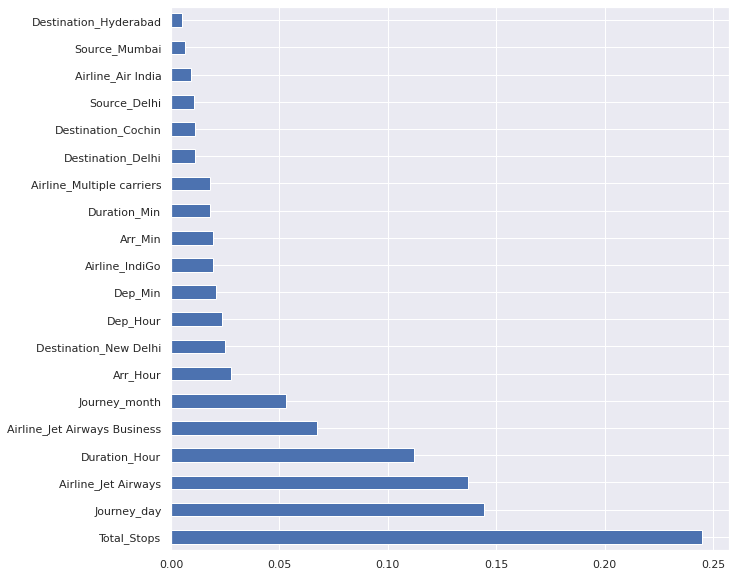

In [ ]:
# Plotting the feature importance wrt to index for better visualization
plt.figure(figsize=(10,10))
feature_imp = pd.Series(data=featureimportance,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

## Fitting the model using Random Forest Regressor


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=21)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
rf = RandomForestRegressor()

In [ ]:
# Hyperparameter Tuning 

## No. of decision trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num=12)]

## No. of features to be considered at each level
max_features = ['auto','sqrt']

## Max no. of levels in each tree
max_depth = [int(x) for x in np.linspace(start=5 , stop=30,num=6)]

## Min no. of samples required to split the node
min_samples_split = [2,5,10,15,100]

## Min no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
# RandomizedSearchCV is faster than GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rfregressor = RandomizedSearchCV(rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=21)

In [ ]:
rfregressor.fit(Xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.4s
[CV] n_estimators=100, min_samples_split=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
y_pred = rfregressor.predict(Xtest)

In [ ]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

RMSE: 1864.952885286749


In [ ]:
r2_score(ytest, y_pred)

0.8456942679085113

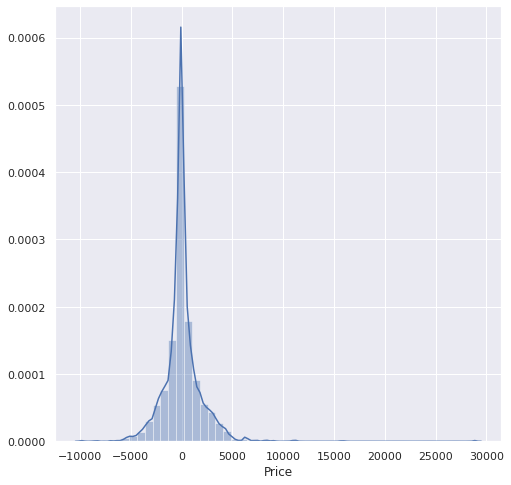

In [ ]:
# Plot distribution of difference between predicted and actual value
plt.figure(figsize = (8,8))
sns.distplot(ytest-y_pred)
plt.show()

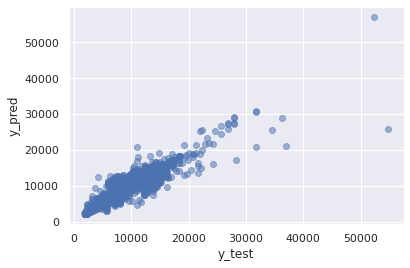

In [ ]:
# Scatter Plot of actual test value and predicted test value
plt.scatter(ytest, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Saving the model

In [ ]:
import joblib
joblib.dump(rfregressor,'model.pkl')

['model.pkl']